# Instructions

An example of Python code to compute the Black-Scholes formula for a European Call option was provided during the lectures. 
By definition, the **Greeks** of an option are the partial derivatives of the option price with respect to its parameters.
In the Black-Scholes model, the **Greeks** of the European Call option can be computed analytically. For example, using the same notations as in the lectures, the **Theta** of the European Call option, which is the partial derivative of the option price with respect to the time to maturity $T$, is given by
$${\Theta}_{\mathrm{Call}}=\frac{{\partial}\mathrm{Call}}{{\partial}T}=rKe^{-rT}\mathcal{N}(d_2)+\frac{{\sigma}S_0}{2\sqrt{T}}\mathcal{N}'(d_1)$$
where

$$d_1 = \frac{\log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt{T}}\ ,\hspace{10mm}d_2 = d_1-\sigma\sqrt{T}$$  
where $\mathcal{N}$ is the cumulative distribution function (CDF) of a standard Gaussian variable, and therefore $\mathcal{N}'$, the derivative of $\mathcal{N}$, is the probability distribution function (PDF) of a standard Gaussian variable. Note that we ignore the dividend yield parameter for this exercise.


---

### **Question 1**

a\) Write a Python function to compute the Theta of a European Call option in the Black-Scholes model.

b\) Write a Python program to plot this Theta between $T_{\min}=1/52$ (one week) and $T_{\max}=1$ (one year). Use the following option parameters:
```
S0 = 20.0
K = 20.0
sigma = 0.35
r = 0.05
```

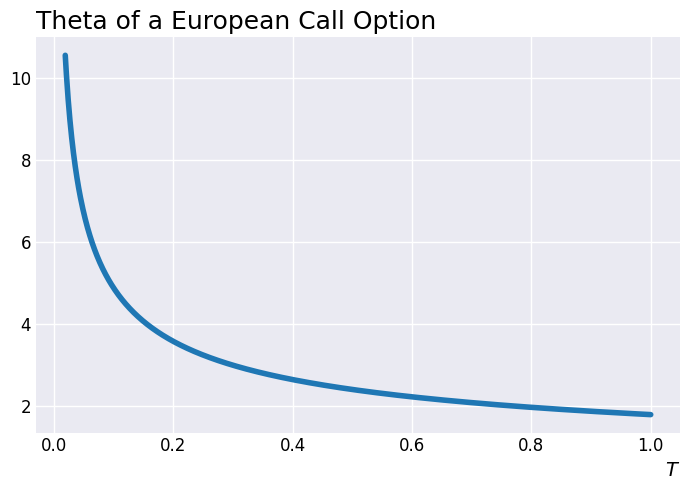

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

N = norm.cdf
N_D1 = norm.pdf

def THETA_BS_CALL(S0: float, K: float, T: float, r: float, sigma: float) -> float:
    d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return r * K * np.exp((-r) * T) * N(d2) + ((sigma * S0 * N_D1(d1)) / (2 * np.sqrt(T)))

S0, K, sigma, r = 20.0, 20.0, 0.35, 0.05
T_MIN, T_MAX = 1 / 52, 1.0
T = np.linspace(T_MIN, T_MAX, 1_000)

def PLOT_THETA():
    theta = THETA_BS_CALL(S0, K, T, r, sigma)

    plt.figure(figsize = (7, 5))
    plt.gca().set_facecolor("#eaeaf2")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(axis = "both", which = "both", length = 0, labelsize = 12)
    plt.grid(True, color = "white", linewidth = 1)

    plt.plot(T, theta, linewidth = 4, solid_capstyle = "round")
    
    plt.title("Theta of a European Call Option", fontsize = 18, loc = "left")
    plt.xlabel("$T$", fontsize = 14, loc = "right")

    plt.tight_layout()
    plt.show()

PLOT_THETA()


---

### **Question 2**

Since $\Theta$ is a partial derivative of an analytical formula (the Black-Scholes European Call option price), another way to estimate it is to use a finite-difference scheme. 
Implement a *forward-difference scheme* on the European Call option price to estimate its Theta. Use the following array for the values of $T$
```
Tmin, Tmax = 1/52, 1
T_grid = np.linspace(Tmin, Tmax, N+1)
```
where $N$ takes the following values: 8, 32, 128, 512. The other parameters are the same as in Question 1. Plot the resulting approximated Theta curves with respect to $T$. 

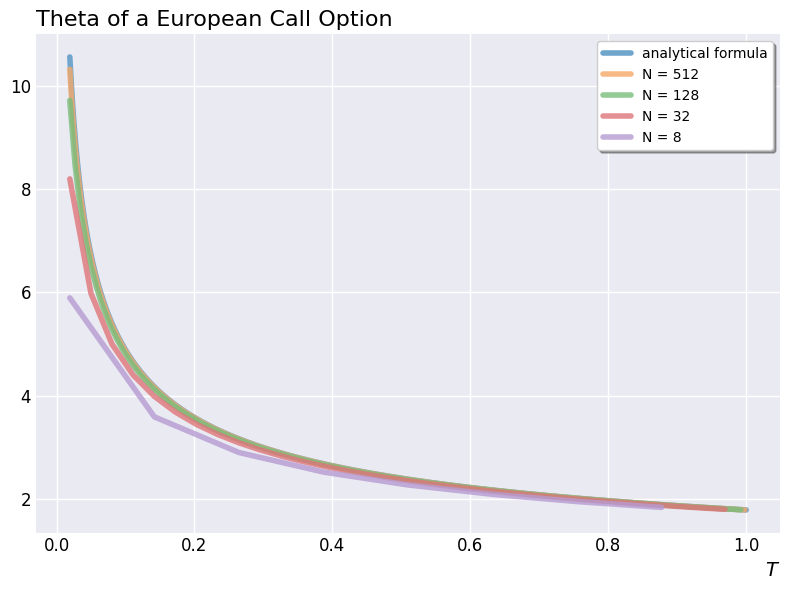

In [ ]:
def BS_CALL(S0: float, K: float, r: float, sigma: float, T: float) -> float:
    d1 = (np.log(S0 / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * N(d1) - K * np.exp((-r) * T) * N(d2)

def FORWARD_FINITE_DIFFERENCE_THETA(S0: float, K: float, r: float, sigma: float, T_grid: np.array) -> float:
    
    N = len(T_grid) - 1         # N + 1 points, N intervals. We can only calculate forward-difference at the beginning of each interval.
    theta_approx = np.zeros(N)
    
    h = T_grid[1] - T_grid[0]
    for i in range(N):
        C_T = BS_CALL(S0, K, r, sigma, T_grid[i])
        C_T_h = BS_CALL(S0, K, r, sigma, T_grid[i] + h)
        theta_approx[i] = (C_T_h - C_T) / h

    return T_grid[:N], theta_approx # The last point does not have forward-difference

S0, K, r, sigma = 20.0, 20.0, 0.05, 0.35
T_min, T_max = 1/52, 1.0
N_values = np.array([512, 128, 32, 8])

def PLOT_ALL_THETA() -> None:
    plt.figure(figsize = (8, 6))
    plt.gca().set_facecolor("#eaeaf2")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(axis = "both", which = "both", length = 0, labelsize = 12)
    plt.grid(True, color = "white", linewidth = 1)

    exact_T = np.linspace(T_min, T_max, 1_000)
    exact_theta = THETA_BS_CALL(S0, K, exact_T, r, sigma)
    plt.plot(exact_T, exact_theta, linewidth = 4, solid_capstyle = "round", color = "#70a5cc", label = "analytical formula")

    colors = ["#f6a969", "#78bd7b", "#de7579", "#b69bd2"]
    for idx, N in enumerate(N_values):
        T = np.linspace(T_min, T_max, N + 1)
        T_approx, theta_approx = FORWARD_FINITE_DIFFERENCE_THETA(S0, K, r, sigma, T)
        plt.plot(T_approx, theta_approx, linewidth = 4, solid_capstyle = "round", alpha = 0.8, color = colors[idx], label = f"N = {N_values[idx]}")

    plt.title("Theta of a European Call Option", fontsize = 16, loc = "left")
    plt.xlabel("$T$", fontsize = 14, loc = "right")

    plt.legend(loc = "upper right", frameon = True, fancybox = True, shadow = True)
    plt.tight_layout()
    plt.show()

PLOT_ALL_THETA()


---

### **Question 3**

a\) Write a Python program to find the value of $N$ such that the *absolute error* between the analytical $\Theta$ and the forward-difference approximation of $\Theta$ at $T=T_{\min}=1/52$ becomes lower than $10^{-2}$. 

b\) What is the corresponding value of the forward-difference mesh size $\Delta_T$ for such an $N$?  


In [ ]:
# Write your code here

def FIND_REQUIRED_N(S0: float, K: float, r: float, sigma: float, target_T: float, target_error: float = 1e-2) -> tuple:
    """
    Initially, I started with an initial value of N = 512 and iterated by multiplying N by 4 each time.
    This approach led me to N = 8192, where the error remained above the target threshold of 0.01.

    To achieve greater precision, I then shifted to a more granular search strategy. 
    Beginning at N = 8192, I incremented N by 500 per iteration, reaching N = 12692 while the error still exceeded 0.01.

    Subsequently, I refined the search further by increasing N in steps of 10 from N = 12692, arriving at N = 12822 where the error continued to remain above the target.

    Finally, I conducted an exhaustive search by incrementing N by 1 from N = 12822, which ultimately allowed me to pinpoint the exact value where the error condition was satisfied.
    """

    # N = 512  # This can be obtained from the last output figure.
    N = 12822

    while True:
        T_grid = np.linspace(T_min, T_max, N + 1)
        h = T_grid[1] - T_grid[0]
        T_points, theta_fd = FORWARD_FINITE_DIFFERENCE_THETA(S0, K, r, sigma, T_grid)   # Calculate finite-difference approximation on the grid.

        theta_exact = THETA_BS_CALL(S0, K, target_T, r, sigma)  # Calculate the analytical theta at target T.
        theta_fd_target_T = theta_fd[0]     # Obtain the finite-difference value at the target T.
        
        absolute_error = abs(theta_fd_target_T - theta_exact)

        print(f"N = {N}, h = {h}, Absolute Error = {absolute_error}")
        if absolute_error < target_error:
            print(f"\nRequired N: {N}")
            print(f"Corresponding mesh size: {h}")
            print(f"Absolute error at target T: {absolute_error}")
            return N, h

        N += 1

        if N > 100_000:
            print("Warning: Maximum N reached!")
            return N, h

required_N, mesh_size = FIND_REQUIRED_N(S0, K, r, sigma, target_T = T_min)


N = 12822, h = 0.000076, Absolute Error = 0.010005
N = 12823, h = 0.000076, Absolute Error = 0.010004
N = 12824, h = 0.000076, Absolute Error = 0.010003
N = 12825, h = 0.000076, Absolute Error = 0.010003
N = 12826, h = 0.000076, Absolute Error = 0.010002
N = 12827, h = 0.000076, Absolute Error = 0.010001
N = 12828, h = 0.000076, Absolute Error = 0.010000
N = 12829, h = 0.000076, Absolute Error = 0.009999

Required N: 12829
Corresponding mesh size: 0.000076
Absolute error at target T: 0.009999
